# midecal expenses
___

## 1 import dependencies 


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

### 1.1 load data

In [2]:
try:
          data=pd.read_csv("med-insurance.csv")
          print (data.shape)
except BaseException as error:
        print("Error message: ",error)

(1338, 7)


In [3]:
data = pd.DataFrame(data)
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


## 2 data processing and visualisation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
sns.set_style("ticks")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor']= '#eafeaf'

In [7]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
fig = px.histogram(data, x="age", y="expenses", marginal='box',
                   nbins=50, title="diestrepution of age")
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig_bmi_1 = px.density_contour(
    data, x="bmi", y="expenses", title="body mass index and her efect on the expenses")

fig_bmi_1.update_layout(bargap=.01)

fig_bmi_1.show()

In [10]:
fig_bmi = px.histogram(data
                       , x="bmi"
                       , marginal='box'
                       , color_discrete_sequence=['red']
                       , title="body mass index")
fig_bmi.update_layout(bargap=.01)
fig_bmi.show()

In [11]:
fig_bmi = px.histogram(data, x="bmi", y="expenses", marginal='box', color_discrete_sequence=[
                       'red'], title="body mass index")
fig_bmi.update_layout(bargap=.01)
fig_bmi.show()

In [12]:
fig_expenses_smok = px.histogram(data,
                                      x="expenses", 
                                      marginal='box',
                                      color="smoker",
                                      color_discrete_sequence=['green', 'grey'],
                                      title="expenses depend on smoking or not smoking ")
fig_expenses_smok.update_layout(bargap=0.1)
fig_expenses_smok.show()

In [13]:
fig_expenses = px.density_heatmap(
    data, x="expenses", animation_frame="age", animation_group="expenses", title="body mass index")
fig_expenses.update_layout(bargap=.01)
fig_expenses.show()

In [14]:
fig_expenses = px.density_contour(
                                  data,
                                  x="expenses",
                                  animation_frame="smoker", 
                                  animation_group="expenses", 
                                  title="body mass index")
fig_expenses.update_layout(bargap=.01)
fig_expenses.show()

In [15]:
data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
fig=px.histogram(data,x="smoker",color="sex",title="sokers depend on sex")
fig.update_layout(bargap=.01)
fig.show()

In [17]:
fig_2 = px.scatter(data, x="age",y="expenses",color="smoker",opacity=.8,hover_data=['sex'],title="age VS expenses")
fig_2.update_traces(marker_size=6)
fig_2.show()

In [18]:
fig_3 = px.scatter(data, x="bmi", y="expenses", color="smoker",
                   opacity=.8, hover_data=['sex'], title="bmi VS expenses")
fig_3.update_traces(marker_size=6)
fig_3.show()

In [19]:
fig_4 = px.violin(data, x="children", y="expenses", 
                     title="children VS expenses")
fig_4.update_traces(marker_size=6)
fig_4.show()

In [20]:
fig_4 = px.violin(data, x="sex", y="expenses",
                  title="sex VS expenses")
fig_4.update_traces(marker_size=6)
fig_4.show()

In [21]:
age_cor=data.expenses.corr(data.age)
bmi_cor=data.expenses.corr(data.bmi)
children_cor = data.expenses.corr(data.children)

print(
    "the correlation betwen age and expenses:-\n{0}\n{3}\nthe correlation betwen bmi and expenses:-\n{1}\n{3}\nthe correlation betwen children and expenses:-\n{2}\n{3}\n".format(age_cor,
                                                                                                                                                                                  bmi_cor,
                                                                                                                                                                                  children_cor,
                                                                                                                                                                                  "===="*5))


the correlation betwen age and expenses:-
0.2990081922850828
the correlation betwen bmi and expenses:-
0.198576255018932
the correlation betwen children and expenses:-
0.06799823000532818



# 1 Build model 
## 1.1 laple en coding data        

In [22]:
data_n= data.copy()
data_n["smoker_code"]= data_n.smoker.map({"yes":1, "no":0})
data_n["sex_codee"]= data_n.sex.map({"male":1,"female":0})
data_n

,age,sex,bmi,children,smoker,region,expenses,smoker_code,sex_codee
0,19,female,27.9,0,yes,southwest,16884.92,1,0
1,18,male,33.8,1,no,southeast,1725.55,0,1
2,28,male,33.0,3,no,southeast,4449.46,0,1
3,33,male,22.7,0,no,northwest,21984.47,0,1
4,32,male,28.9,0,no,northwest,3866.86,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0,1
1334,18,female,31.9,0,no,northeast,2205.98,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0


### 1.2 one hot en coding data region section

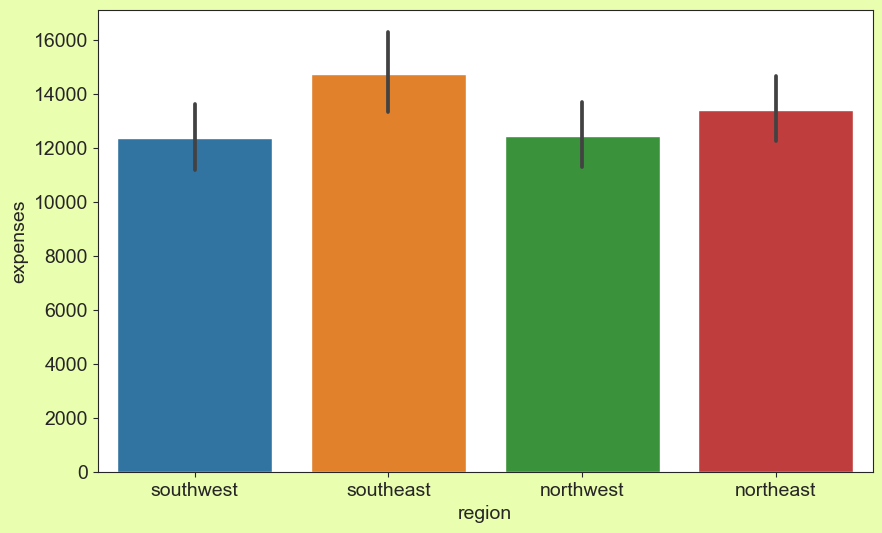

In [23]:
sns.barplot(data=data_n, x='region',y="expenses");

In [24]:
enc=OneHotEncoder()
enc.fit(data_n[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [25]:
one_hot=enc.transform(data_n[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [26]:
data_n[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot
data_n

,age,sex,bmi,children,smoker,region,expenses,smoker_code,sex_codee,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,1,0,0.0,0.0,0.0,1.0
1,18,male,33.8,1,no,southeast,1725.55,0,1,0.0,0.0,1.0,0.0
2,28,male,33.0,3,no,southeast,4449.46,0,1,0.0,0.0,1.0,0.0
3,33,male,22.7,0,no,northwest,21984.47,0,1,0.0,1.0,0.0,0.0
4,32,male,28.9,0,no,northwest,3866.86,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.9,0,no,northeast,2205.98,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.8,0,no,southwest,2007.95,0,0,0.0,0.0,0.0,1.0


In [27]:
col_nams=['age', 'bmi', 'children',
       'smoker_code', 'sex_codee', 'northeast', 'northwest', 'southeast',
          'southwest' ,'expenses']
data_fram_new= data_n[col_nams]
data_fram_new

,age,bmi,children,smoker_code,sex_codee,northeast,northwest,southeast,southwest,expenses
0,19,27.9,0,1,0,0.0,0.0,0.0,1.0,16884.92
1,18,33.8,1,0,1,0.0,0.0,1.0,0.0,1725.55
2,28,33.0,3,0,1,0.0,0.0,1.0,0.0,4449.46
3,33,22.7,0,0,1,0.0,1.0,0.0,0.0,21984.47
4,32,28.9,0,0,1,0.0,1.0,0.0,0.0,3866.86
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,0.0,1.0,0.0,0.0,10600.55
1334,18,31.9,0,0,0,1.0,0.0,0.0,0.0,2205.98
1335,18,36.9,0,0,0,0.0,0.0,1.0,0.0,1629.83
1336,21,25.8,0,0,0,0.0,0.0,0.0,1.0,2007.95


In [28]:
data_fram_new.corr()

,age,bmi,children,smoker_code,sex_codee,northeast,northwest,southeast,southwest,expenses
age,1.000000,0.109341,0.042469,-0.025019,-0.020856,0.002475,-0.000407,-0.011642,0.010016,0.299008
bmi,0.109341,1.000000,0.012645,0.003968,0.046380,-0.138091,-0.135992,0.270144,-0.006398,0.198576
children,0.042469,0.012645,1.000000,0.007673,0.017163,-0.022808,0.024806,-0.023066,0.021914,0.067998
smoker_code,-0.025019,0.003968,0.007673,1.000000,0.076185,0.002811,-0.036945,0.068498,-0.036945,0.787251
sex_codee,-0.020856,0.046380,0.017163,0.076185,1.000000,-0.002425,-0.011156,0.017117,-0.004184,0.057292
northeast,0.002475,-0.138091,-0.022808,0.002811,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,0.006349
northwest,-0.000407,-0.135992,0.024806,-0.036945,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
southeast,-0.011642,0.270144,-0.023066,0.068498,0.017117,-0.345561,-0.346265,1.000000,-0.346265,0.073982
southwest,0.010016,-0.006398,0.021914,-0.036945,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,-0.043210
expenses,0.299008,0.198576,0.067998,0.787251,0.057292,0.006349,-0.039905,0.073982,-0.043210,1.000000


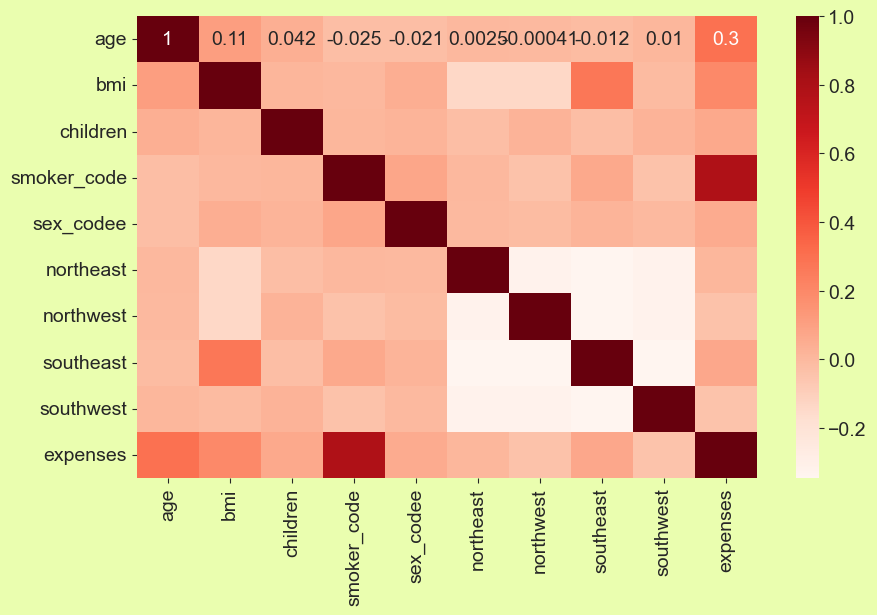

In [29]:
sns.heatmap(data_fram_new.corr(), cmap="Reds",annot=True);

## 2 Building the model

In [30]:
col_nams[:-1]

['age',
 'bmi',
 'children',
 'smoker_code',
 'sex_codee',
 'northeast',
 'northwest',
 'southeast',
 'southwest']

In [31]:
inpout,tergets = data_fram_new[col_nams[:-1]],data_fram_new["expenses"]
inpout

,age,bmi,children,smoker_code,sex_codee,northeast,northwest,southeast,southwest
0,19,27.9,0,1,0,0.0,0.0,0.0,1.0
1,18,33.8,1,0,1,0.0,0.0,1.0,0.0
2,28,33.0,3,0,1,0.0,0.0,1.0,0.0
3,33,22.7,0,0,1,0.0,1.0,0.0,0.0
4,32,28.9,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.9,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.9,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.8,0,0,0,0.0,0.0,0.0,1.0


In [32]:
tergets


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [33]:
model1=LinearRegression()
model2=SGDRegressor()
model1.fit(inpout,tergets)
pridict=model1.predict(inpout)
pridict

array([25292.73983296,  3458.28119063,  6706.61883724, ...,
        4165.74286548,  1246.43276622, 37093.64856899])

In [34]:
print (mean_squared_error(pridict,tergets))
print(mean_absolute_error(pridict,tergets))

36499631.63514606
4170.7309867908


we will try more models to git the beater score and if we need we will use a small nural network to git the gool  

In [35]:
model1.predict(pd.DataFrame([[19	, 27.9	,0	,1	,0	,0.0	,0.0	,0.0	,1.0]]))

c:\Users\Mega\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([25292.73983296])

In [36]:
def plot(X,laple):
          fig = px.scatter(x=X,title="{}".format(laple))
          fig.update_traces(marker_size=6)
          fig.show()

In [37]:
model2.fit(inpout,tergets)
pridict_2= model2.predict(inpout)
pridict_2

array([ -2188.97134318, -21837.57223448, -17835.57665625, ...,
       -22327.69561273, -30843.47708613,   9759.63776403])

In [38]:
from sklearn.svm import LinearSVC,LinearSVR
svr= LinearSVR()
svc= LinearSVC()
svr.fit(inpout,tergets)
# svc.fit(inpout,tergets)
pridict_3=svr.predict(inpout)
pridict_3


array([ 2676.38618355,  1852.036879  ,  4830.68547419, ...,
        1495.89111515,  3079.90271134, 13253.40823625])

In [39]:
print(mean_squared_error(pridict_3, tergets))
print(mean_absolute_error(pridict_3, tergets))


165814275.2134282
6680.947976153561


In [40]:
plot(pridict, "pridiction for the frist model")
plot(pridict_2, "pridict_2 (the pridiction for the 2end model)")  # very error
plot(pridict_3,"pridict_3 (the pridiction for the 3th model)")
plot(tergets ,"the terget")